In [1]:
# Necessary library imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# set seaborn style because it prettier
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

import time
import warnings
import gc
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dataset.csv', sep=',')
data.head(10)

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,0,1,0.0,50.0,50.0,0.000000,50.0,0,0,0,0,0
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,1,2,50.0,50.0,100.0,50.000000,25.0,0,0,0,0,0
2,ea44e97271691990157559d0bdd9959e02790c34db6c00...,1,1,10.0,10.0,20.0,10.000000,10.0,0,0,0,0,0
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,1,1,40.0,30.0,70.0,40.000000,30.0,0,0,0,0,0
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,1,2,30.0,30.0,60.0,30.000000,15.0,0,0,0,0,0
5,298ca2045d174f8a158961806ffc4ef96fad02d71a6b84...,1,0,1.0,0.0,1.0,1.000000,0.0,0,0,0,0,0
6,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,1,2,29.0,29.0,58.0,29.000000,14.5,0,0,0,0,0
7,4385fcf8b14497d0659adccfe06ae7e38e0b5dc95ff8a1...,1,1,1.0,1.0,2.0,1.000000,1.0,0,0,0,0,0
8,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,1,1,28.0,10.0,38.0,28.000000,10.0,0,0,0,0,0
9,a3b0e9e7cddbbe78270fa4182a7675ff00b92872d8df7d...,3,0,61.0,0.0,61.0,20.333333,0.0,0,0,0,0,0


In [3]:
# Shape of the dataset i.e number of rows and columns present in the dataset 
data.shape

(30248134, 13)

In [4]:
# Data description
data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
count,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07
mean,2.148699e+00,2.148699e+00,5.484150e+01,5.484150e+01,1.096830e+02,4.923980e+01,2.877087e+01,4.039919e-05,2.148893e-06,1.553815e-06,3.570468e-06,4.383741e-05
std,7.421447e+00,4.512048e+00,1.303303e+03,1.301473e+03,2.602527e+03,9.729210e+02,7.125567e+02,6.355907e-03,1.465909e-03,1.246520e-03,1.889565e-03,6.620838e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,1.000000e-01,9.950000e-02,2.058720e-01,6.400000e-02,5.025776e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,2.000000e+00,9.325000e-01,9.590000e-01,1.964759e+00,5.350261e-01,4.900000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,8.591912e+00,9.063657e+00,1.840000e+01,5.614287e+00,4.519481e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.932000e+03,1.322000e+03,5.500000e+05,5.000207e+05,1.050000e+06,4.992596e+05,5.000000e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
# Removing redundant data and simplifying dataset

data.drop('tx_hash', axis=1, inplace=True)
data.drop('in_malicious', axis=1, inplace=True)
data.drop('out_malicious', axis=1, inplace=True)
data.drop('is_malicious', axis=1, inplace=True)
data.drop('all_malicious', axis=1, inplace=True)

# Better view of the data described
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
count,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00
mean,2.15,2.15,54.84,54.84,109.68,49.24,28.77,0.00
std,7.42,4.51,1303.30,1301.47,2602.53,972.92,712.56,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,0.10,0.10,0.21,0.06,0.05,0.00
50%,1.00,2.00,0.93,0.96,1.96,0.54,0.49,0.00
75%,2.00,2.00,8.59,9.06,18.40,5.61,4.52,0.00
max,1932.00,1322.00,550000.00,500020.70,1050000.00,499259.59,500000.00,1.00


In [6]:
# The classes are heavily skewed we need to solve this issue later.
# done using scale transformation
print(round(data['out_and_tx_malicious'].value_counts()[0]/len(data) * 100,5), '% of the dataset is non-fraud,while')
print(round(data['out_and_tx_malicious'].value_counts()[1]/len(data) * 100,5), '% of the dataset is fraud')

99.99964 % of the dataset is non-fraud,while
0.00036 % of the dataset is fraud


In [8]:
# total count of valid malicious transaction data
print('Actual Malicious Data count- 0:Non-Malicious, 1:Malicious')
data['out_and_tx_malicious'].value_counts()

Actual Malicious Data count- 0:Non-Malicious, 1:Malicious


0    30248026
1         108
Name: out_and_tx_malicious, dtype: int64

Transformation

In [10]:
# Using nplog1p and robust scaler
# Log scale to normalize the data as the data is heavily skewed
# Scaling dataset
sc_data = data.copy()

# nplog1p is better than nplog
sc_data['indegree'] = np.log1p(sc_data['indegree'])
sc_data['outdegree']= np.log1p(sc_data['outdegree'])
sc_data['in_btc'] = np.log1p(sc_data['in_btc'])
sc_data['out_btc']= np.log1p(sc_data['out_btc'])
sc_data['total_btc']= np.log1p(sc_data['total_btc'])
sc_data['mean_in_btc']= np.log1p(sc_data['mean_in_btc'])
sc_data['mean_out_btc']= np.log1p(sc_data['mean_out_btc'])

sc_data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
count,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00
mean,0.94,1.07,1.33,1.35,1.73,1.17,1.05,0.00
std,0.46,0.27,1.58,1.59,1.80,1.52,1.39,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.69,1.10,0.10,0.09,0.19,0.06,0.05,0.00
50%,0.69,1.10,0.66,0.67,1.09,0.43,0.40,0.00
75%,1.10,1.10,2.26,2.31,2.97,1.89,1.71,0.00
max,7.57,7.19,13.22,13.12,13.86,13.12,13.12,1.00


In [11]:
# RobustScaler because it is less prone to outliers.

scaler = RobustScaler()

sc_data['indegree'] = scaler.fit_transform(sc_data['indegree'].values.reshape(-1,1))
sc_data['outdegree'] = scaler.fit_transform(sc_data['outdegree'].values.reshape(-1,1))
sc_data['in_btc'] = scaler.fit_transform(sc_data['in_btc'].values.reshape(-1,1))
sc_data['out_btc'] = scaler.fit_transform(sc_data['out_btc'].values.reshape(-1,1))
sc_data['total_btc'] = scaler.fit_transform(sc_data['total_btc'].values.reshape(-1,1))
sc_data['mean_in_btc'] = scaler.fit_transform(sc_data['mean_in_btc'].values.reshape(-1,1))
sc_data['mean_out_btc'] = scaler.fit_transform(sc_data['mean_out_btc'].values.reshape(-1,1))

sc_data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
count,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00
mean,0.61,-0.03,0.31,0.31,0.23,0.41,0.40,0.00
std,1.14,0.27,0.73,0.72,0.65,0.83,0.84,0.00
min,-1.71,-1.10,-0.30,-0.30,-0.39,-0.23,-0.24,0.00
25%,0.00,0.00,-0.26,-0.26,-0.32,-0.20,-0.21,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,0.74,0.74,0.68,0.80,0.79,0.00
max,16.95,6.09,5.80,5.62,4.60,6.95,7.67,1.00


Train-Test Split

In [12]:
# Using SMOTE(Synthetic Minority Oversampling Technique) [2] for balancing the dataset. Resulted counts show that now we have exact number of class instances (1 and 0).

def oversample_minority_class(X, y, fraction):
    SM = SMOTE(fraction, n_jobs=-1)
    return SM.fit_resample(X, y)

In [13]:
# train-67% test split = 33%
train_x, test_x, train_y, test_y = train_test_split(sc_data.iloc[:,:-1], sc_data['out_and_tx_malicious'], test_size = 0.3, random_state=42)

In [14]:
print('Train count')
pd.value_counts(train_y)

Train count


0    21173628
1          65
Name: out_and_tx_malicious, dtype: int64

In [15]:
print('Test count')
pd.value_counts(test_y)

Test count


0    9074398
1         43
Name: out_and_tx_malicious, dtype: int64

Modeling

In [33]:
# k means modeling
# training of model
model = {} #inital model count
dist = {} #sum of squared distances

for i in range(2, 15):
    kmeans = MiniBatchKMeans(init='k-means++', n_clusters=i, n_init=5000, max_iter=10000, batch_size=256)
    kmeans.fit(train_x)
    model[i] = kmeans
    labels = kmeans.labels_
    dist[i] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print("===================================")
    print("\n Modeling complete with k = "+str(i))



 Modeling complete with k = 2

 Modeling complete with k = 3

 Modeling complete with k = 4

 Modeling complete with k = 5

 Modeling complete with k = 6

 Modeling complete with k = 7

 Modeling complete with k = 8

 Modeling complete with k = 9

 Modeling complete with k = 10

 Modeling complete with k = 11

 Modeling complete with k = 12

 Modeling complete with k = 13

 Modeling complete with k = 14


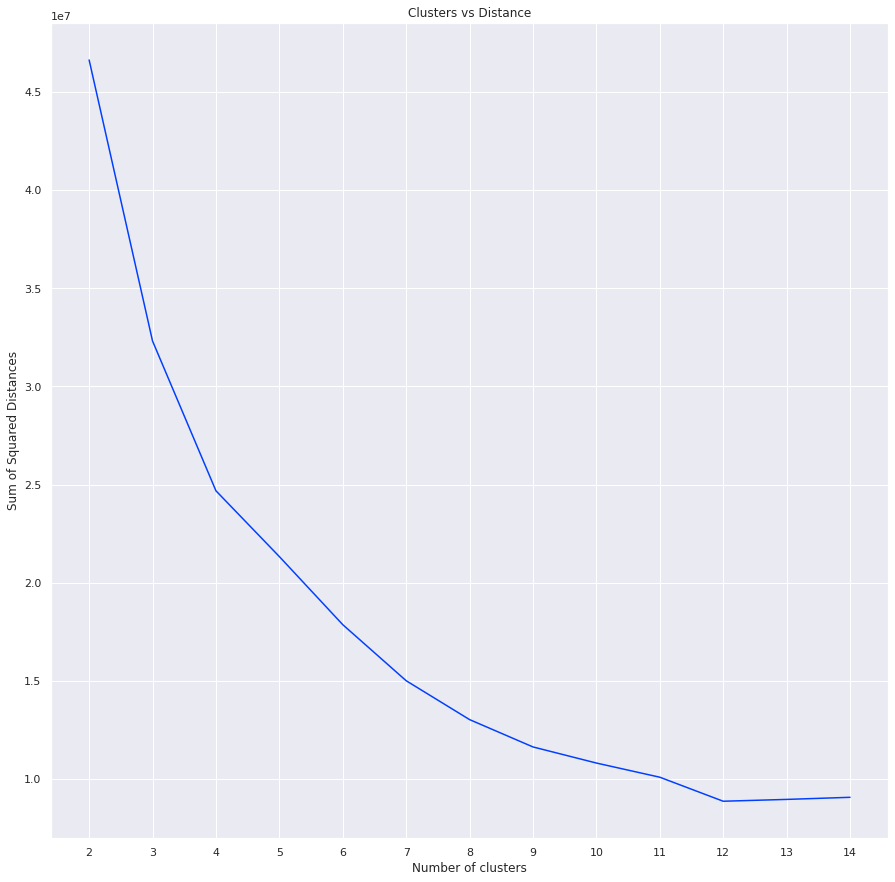

In [34]:
# plotting of clusters vs dist

#Sum of distances of samples to their closest cluster center
plt.figure(figsize=(15,15))
plt.plot(list(dist.keys()), list(dist.values()))
plt.xticks(list(dist.keys()))

plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Distances")
plt.title("Clusters vs Distance")

plt.style.use('seaborn-bright')
plt.show()

Saving Model

In [48]:

# Train Data Evaluation(tabular format)
pred = {}
count_nonfraud=pd.value_counts(train_y)[0]
count_fraud=pd.value_counts(train_y)[1]
for i in model:
    print('Model with K='+str(i)+'\n'+'---------------------------------------------------------------------------------\n')
    pred[i]=model.get(i).predict(train_x)
    print("Trained Predictions for K="+str(i))
    start=0
    ctdct={}
    count_start = set(np.where(train_y == 1)[0])
    for predictions in pred[i]:
        ctdct[predictions]=ctdct.get(predictions, 0) + 0
        if start in count_start:
            ctdct[predictions]=ctdct.get(predictions, 0) + 1
        start=start+1
    for key, value in sorted(ctdct.items()):
        non_malicious=len((np.where(pred[i]==key)[0]))-value
        print('Cluster '+str(key+1)+': \t Malicious: '+str(value)+ ' ('+str(round((value*100)/count_fraud,2))+'%)' +' \t Non-Malicious: '+str(non_malicious)+' ('+str(round((non_malicious*100)/count_nonfraud,2))+'%)\n')
    print('\n')

Model with K=2
---------------------------------------------------------------------------------

Trained Predictions for K=2
Cluster 1: 	 Malicious: 11 (16.92%) 	 Non-Malicious: 15397999 (72.72%)

Cluster 2: 	 Malicious: 54 (83.08%) 	 Non-Malicious: 5775629 (27.28%)



Model with K=3
---------------------------------------------------------------------------------

Trained Predictions for K=3
Cluster 1: 	 Malicious: 17 (26.15%) 	 Non-Malicious: 3027734 (14.3%)

Cluster 2: 	 Malicious: 4 (6.15%) 	 Non-Malicious: 12796938 (60.44%)

Cluster 3: 	 Malicious: 44 (67.69%) 	 Non-Malicious: 5348956 (25.26%)



Model with K=4
---------------------------------------------------------------------------------

Trained Predictions for K=4
Cluster 1: 	 Malicious: 5 (7.69%) 	 Non-Malicious: 4793045 (22.64%)

Cluster 2: 	 Malicious: 15 (23.08%) 	 Non-Malicious: 2941662 (13.89%)

Cluster 3: 	 Malicious: 4 (6.15%) 	 Non-Malicious: 11133222 (52.58%)

Cluster 4: 	 Malicious: 41 (63.08%) 	 Non-Malicious: 2

Test Data Evaluation

In [57]:

test_preds = {}
count_nonfraud = pd.value_counts(test_y)[0]
count_fraud = pd.value_counts(test_y)[1]
for i in model:
    print('Model with K='+str(i)+'\n'+'--------------------------------------------------------------------------\n')
    test_preds[i] = model.get(i).predict(test_x)
    print("Tested Predictions for K="+str(i))
    start=0
    ctdct={}
    count_start=set(np.where(test_y==1)[0])
    for predictions in test_preds[i]:
        ctdct[predictions]=ctdct.get(predictions,0) + 0
        if start in count_start:
            ctdct[predictions]=ctdct.get(predictions,0) + 1
        start=start+1
    for key, value in sorted(ctdct.items()):
        non_malicious=len((np.where(test_preds[i]==key)[0]))-value
        print('Cluster '+str(key+1)+': \t Malicious: '+str(value)+ ' ('+str(round((value*100)/count_fraud,3))+'%)' +' \t Non-Malicious: '+str(non_malicious)+' ('+str(round((non_malicious*100)/count_nonfraud,3))+'%)\n')
    print('\n')

Model with K=2
--------------------------------------------------------------------------

Tested Predictions for K=2
Cluster 1: 	 Malicious: 6 (13.953%) 	 Non-Malicious: 6599186 (72.723%)

Cluster 2: 	 Malicious: 37 (86.047%) 	 Non-Malicious: 2475212 (27.277%)



Model with K=3
--------------------------------------------------------------------------

Tested Predictions for K=3
Cluster 1: 	 Malicious: 7 (16.279%) 	 Non-Malicious: 1297382 (14.297%)

Cluster 2: 	 Malicious: 4 (9.302%) 	 Non-Malicious: 5485955 (60.455%)

Cluster 3: 	 Malicious: 32 (74.419%) 	 Non-Malicious: 2291061 (25.248%)



Model with K=4
--------------------------------------------------------------------------

Tested Predictions for K=4
Cluster 1: 	 Malicious: 5 (11.628%) 	 Non-Malicious: 2055741 (22.654%)

Cluster 2: 	 Malicious: 6 (13.953%) 	 Non-Malicious: 1260153 (13.887%)

Cluster 3: 	 Malicious: 1 (2.326%) 	 Non-Malicious: 4771383 (52.581%)

Cluster 4: 	 Malicious: 31 (72.093%) 	 Non-Malicious: 987121 (10.8

Evaluation Metrics Util

In [81]:


def eval_summary(test_y, predictions, clf_name):
    print('For ' + clf_name)
    print('Balanced Accuracy is: '+ str(round(balanced_accuracy_score(test_y, predictions),5)))
    print('Macro Precision is: '+ str(round(precision_score(test_y, predictions, average="macro"),5)))
    print('Macro Recall is: '+ str(round(recall_score(test_y,predictions, average="macro"),5)))
    print('Macro F1 is: '+ str(round(f1_score(test_y,predictions, average="macro"),5)))
    print('\n')
    print('Normal Accuracy is: '+ str(round(accuracy_score(test_y, predictions),5)))
    print('Normal Recall is: '+ str(round(recall_score(test_y,predictions),5)))
    print('\n')
    print(classification_report(test_y, predictions, labels=[0, 1]))
    print('\n')

Merging of trained clusters

In [82]:
print('For K='+str(k))
# merge = [4,2]

prediction = test_predictions[k].copy()
t_prediction = trained_predictions[k].copy()


if len(pd.value_counts(t_prediction)) > 2 and len(pd.value_counts(prediction)) > 2:
    for i in range(0,k):
        if (i+1) in merge:
            prediction[prediction == i] = -1
            t_prediction[t_prediction == i] = -1
        else:
            prediction[prediction == i] = 0
            t_prediction[t_prediction == i] = 0

    prediction[prediction == -1] = 1
    t_prediction[t_prediction == -1] = 1

    print('Merged Cluster Result for Trained Predicitons :\n')
    print(pd.value_counts(t_prediction))

    print('\n\n Merged Cluster Result for Tested Predicitons:\n')
    print(pd.value_counts(prediction))




For K=14
Merged Cluster Result for Trained Predicitons :

0    20202204
1      971489
dtype: int64


 Merged Cluster Result for Tested Predicitons:

0    8659018
1     415423
dtype: int64


Training Evaluation Results

In [83]:
eval_summary(train_y, t_prediction, 'K-means (K='+str(k)+')')

For K-means (K=14)
Balanced Accuracy is: 0.70014
Macro Precision is: 0.50001
Macro Recall is: 0.70014
Macro F1 is: 0.48829


Normal Accuracy is: 0.95412
Normal Recall is: 0.44615


              precision    recall  f1-score   support

           0       1.00      0.95      0.98  21173628
           1       0.00      0.45      0.00        65

    accuracy                           0.95  21173693
   macro avg       0.50      0.70      0.49  21173693
weighted avg       1.00      0.95      0.98  21173693





Test Evaluation Results

In [84]:
eval_summary(test_y, prediction, 'K-means (K='+str(k)+')')

For K-means (K=14)
Balanced Accuracy is: 0.62827
Macro Precision is: 0.50001
Macro Recall is: 0.62827
Macro F1 is: 0.48832


Normal Accuracy is: 0.95422
Normal Recall is: 0.30233


              precision    recall  f1-score   support

           0       1.00      0.95      0.98   9074398
           1       0.00      0.30      0.00        43

    accuracy                           0.95   9074441
   macro avg       0.50      0.63      0.49   9074441
weighted avg       1.00      0.95      0.98   9074441





Confusion Matrices

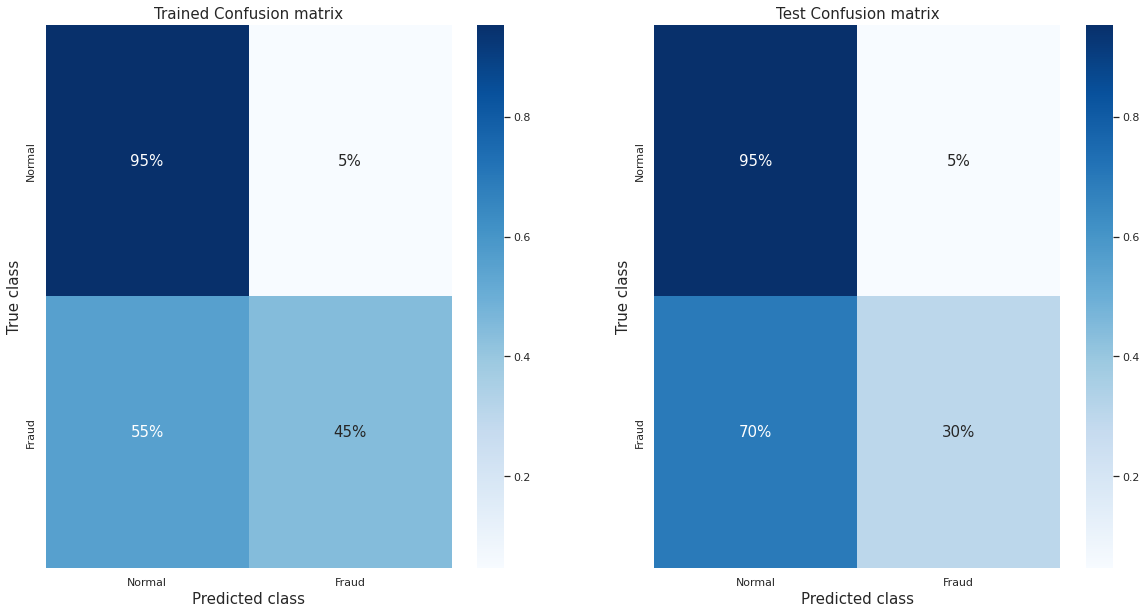

In [88]:
def matrix(matrix_train, matrix_test):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    LABELS = ["Normal", "Fraud"]
    #Confusion Matrix Visual
    matrix_train = matrix_train.astype('float') / (matrix_train.sum(axis=1)[:, np.newaxis])
    sns.heatmap(matrix_train, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt=".0%", annot_kws={"size": 15}, ax=ax1, cmap="Blues")
    ax1.set_title("Trained Confusion matrix", fontsize=15)
    ax1.set_ylabel('True class', fontsize=15)
    ax1.set_xlabel('Predicted class', fontsize=15)

    matrix_test = matrix_test.astype('float') / (matrix_test.sum(axis=1)[:, np.newaxis])
    sns.heatmap(matrix_test, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt=".0%", annot_kws={"size": 15}, ax=ax2, cmap="Blues")
    ax2.set_title("Test Confusion matrix", fontsize=15)
    ax2.set_ylabel('True class', fontsize=15)
    ax2.set_xlabel('Predicted class', fontsize=15)


cnf_mtx_test = confusion_matrix(test_y, prediction)
cnf_mtx_train = confusion_matrix(train_y, t_prediction)

matrix(cnf_mtx_train, cnf_mtx_test)

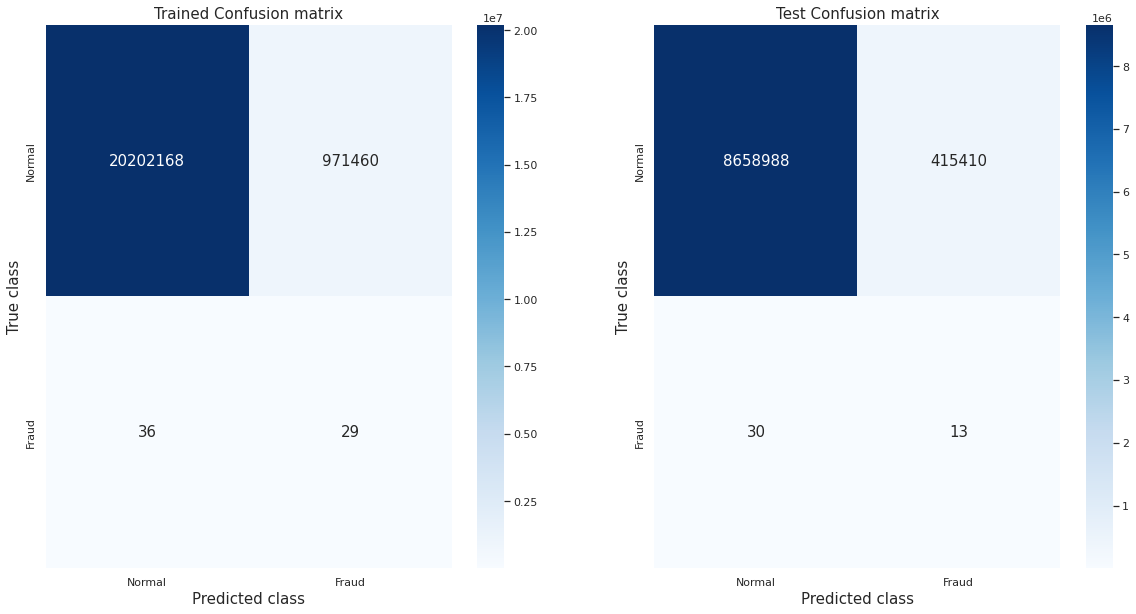

In [89]:
def matrix_count(matrix_train, matrix_test):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    LABELS = ["Normal", "Fraud"]

    sns.heatmap(matrix_train, xticklabels=LABELS, yticklabels=LABELS,  annot=True, annot_kws={"size": 15}, fmt="d", ax=ax1, cmap="Blues");
    ax1.set_title("Trained Confusion matrix", fontsize=15)
    ax1.set_ylabel('True class', fontsize=15)
    ax1.set_xlabel('Predicted class', fontsize=15)

    sns.heatmap(matrix_test, xticklabels=LABELS, yticklabels=LABELS, annot=True, annot_kws={"size": 15}, fmt="d", ax=ax2, cmap="Blues");
    ax2.set_title("Test Confusion matrix", fontsize=15)
    ax2.set_ylabel('True class', fontsize=15)
    ax2.set_xlabel('Predicted class', fontsize=15)


matrix_count(cnf_mtx_train, cnf_mtx_test)